In [3]:
!pip install keras-tcn
!pip install -U finance-datareader
!pip install silence_tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for silence-tensorflow: filename=silence_tensorflow-1.2.1-py3-none-any.whl size=4465 sha256=5e46ed052c4a3c29f64f4831461778e560369ed4e136f542119555234c42a4d6
  Stored in directory: /home/work/.cache/pip/wheels/19/a3/b3/88021fd4ff3a82ed03067ca8935323b55ca23ec8e21b2e44e0
  Created wheel for support-developer: filename=support_developer-1.0.5-py3-none-any.whl size=5629 sha256=17fb0ff2dbf415a27d937c0b97041669bc6c148e163c0b0bdca75d4e64bd5b5e
  Stored in directory: /home/work/.cache/pip/wheels/11/5e/63/51e84640e77a7dc5f1e5f5eb597e8f1bc730a2818ee5c3fc03
Successfully built silence-tensorflow support-developer
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
from silence_tensorflow import silence_tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

silence_tensorflow()

/home/work/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
2023-01-18 05:08:30.929009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 05:08:34.776015: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-18 05:08:56.298744: W tensorflow/compiler/xla/stream_executor/platform/default/

In [87]:
kospi_train = fdr.DataReader('KS11', '1990-01-01','2017-12-31')['Close']
print(kospi_train)
print(kospi_train.shape)
print(kospi_train.isnull().any())

kospi_volume_train = fdr.DataReader('KS11', '1990-01-01','2017-12-31')['Volume']
print(kospi_volume_train)
print(kospi_volume_train.shape)
print(kospi_volume_train.isnull().any())

Date
1996-12-11     704.679993
1996-12-12     689.380005
1996-12-13     689.070007
1996-12-16     673.919983
1996-12-17     663.349976
                 ...     
2017-12-21    2429.830078
2017-12-22    2440.540039
2017-12-26    2427.340088
2017-12-27    2436.669922
2017-12-28    2467.489990
Name: Close, Length: 5341, dtype: float64
(5341,)
True
Date
1996-12-11     28000.0
1996-12-12     25900.0
1996-12-13     26500.0
1996-12-16     22800.0
1996-12-17     31600.0
                ...   
2017-12-21    247300.0
2017-12-22    230400.0
2017-12-26    224600.0
2017-12-27    194900.0
2017-12-28    220300.0
Name: Volume, Length: 5341, dtype: float64
(5341,)
True


In [88]:
kospi_test = fdr.DataReader('KS11', '2018-01-01')['Close']
print(kospi_test)
print(kospi_test.shape)
print(kospi_test.isnull().any())

kospi_volume_test = fdr.DataReader('KS11', '2018-01-01')['Volume']
print(kospi_volume_test)
print(kospi_volume_test.shape)
print(kospi_volume_test.isnull().any())

Date
2018-01-02    2479.649902
2018-01-03    2486.350098
2018-01-04    2466.459961
2018-01-05    2497.520020
2018-01-08    2513.280029
                 ...     
2023-01-12    2365.100098
2023-01-13    2386.090088
2023-01-16    2399.860107
2023-01-17    2379.389893
2023-01-18    2364.959961
Name: Close, Length: 1243, dtype: float64
(1243,)
False
Date
2018-01-02    262200
2018-01-03    331100
2018-01-04    333800
2018-01-05    308800
2018-01-08    311400
               ...  
2023-01-12    580100
2023-01-13    861700
2023-01-16    517800
2023-01-17    536000
2023-01-18    451005
Name: Volume, Length: 1243, dtype: int64
(1243,)
False


In [89]:
kospi_train=kospi_train.dropna()
kospi_test=kospi_test.dropna()
print(kospi_train)
print(kospi_train.isnull().any())
print(kospi_test)
print(kospi_test.isnull().any())

kospi_volume_train=kospi_volume_train.dropna()
kospi_volume_test=kospi_volume_test.dropna()
print(kospi_volume_train)
print(kospi_volume_train.isnull().any())
print(kospi_volume_test)
print(kospi_volume_test.isnull().any())

Date
1996-12-11     704.679993
1996-12-12     689.380005
1996-12-13     689.070007
1996-12-16     673.919983
1996-12-17     663.349976
                 ...     
2017-12-21    2429.830078
2017-12-22    2440.540039
2017-12-26    2427.340088
2017-12-27    2436.669922
2017-12-28    2467.489990
Name: Close, Length: 5192, dtype: float64
False
Date
2018-01-02    2479.649902
2018-01-03    2486.350098
2018-01-04    2466.459961
2018-01-05    2497.520020
2018-01-08    2513.280029
                 ...     
2023-01-12    2365.100098
2023-01-13    2386.090088
2023-01-16    2399.860107
2023-01-17    2379.389893
2023-01-18    2364.959961
Name: Close, Length: 1243, dtype: float64
False
Date
1996-12-11     28000.0
1996-12-12     25900.0
1996-12-13     26500.0
1996-12-16     22800.0
1996-12-17     31600.0
                ...   
2017-12-21    247300.0
2017-12-22    230400.0
2017-12-26    224600.0
2017-12-27    194900.0
2017-12-28    220300.0
Name: Volume, Length: 5192, dtype: float64
False
Date
2018-01-02

In [90]:
kospi_train = kospi_train.values
kospi_test = kospi_test.values

kospi_volume_train = kospi_volume_train.values
kospi_volume_test = kospi_volume_test.values

In [99]:
lookback_window = 60
x_train_1, y_train_1 = [[],[]], []
x_train_7, y_train_7 = [[],[]], []
x_train_15, y_train_15 = [[],[]], []
x_train_30, y_train_30 = [[],[]], []

In [100]:
for i in range(lookback_window, len(kospi_train)):
    x_train_1[0].append(kospi_train[i - lookback_window:i])
    y_train_1.append(kospi_train[i])

for i in range(lookback_window, len(kospi_train)-6):
    x_train_7[0].append(kospi_train[i - lookback_window:i])
    y_train_7.append(kospi_train[i:i+7])

for i in range(lookback_window, len(kospi_train)-14):
    x_train_15[0].append(kospi_train[i - lookback_window:i])
    y_train_15.append(kospi_train[i:i+15])

for i in range(lookback_window, len(kospi_train)-29):
    x_train_30[0].append(kospi_train[i - lookback_window:i])
    y_train_30.append(kospi_train[i:i+30])

In [101]:
for i in range(lookback_window, len(kospi_volume_train)):
    x_train_1[1].append(kospi_volume_train[i - lookback_window:i])
    
for i in range(lookback_window, len(kospi_volume_train)-6):
    x_train_7[1].append(kospi_volume_train[i - lookback_window:i])

for i in range(lookback_window, len(kospi_volume_train)-14):
    x_train_15[1].append(kospi_volume_train[i - lookback_window:i])

for i in range(lookback_window, len(kospi_volume_train)-29):
    x_train_30[1].append(kospi_volume_train[i - lookback_window:i])

In [104]:
x_train_1 = np.array(x_train_1)
y_train_1 = np.array(y_train_1)
x_train_1 = x_train_1.reshape((5132, -1, 2))
y_train_1 = y_train_1.reshape((-1, 1))

x_train_7 = np.array(x_train_7)
y_train_7 = np.array(y_train_7)
x_train_7 = x_train_7.reshape((5126, -1, 2))
y_train_7 = y_train_7.reshape((5126, -1))

x_train_15 = np.array(x_train_15)
y_train_15 = np.array(y_train_15)
x_train_15 = x_train_15.reshape((5118, -1, 2))
y_train_15 = y_train_15.reshape((5118, -1))

x_train_30 = np.array(x_train_30)
y_train_30 = np.array(y_train_30)
x_train_30 = x_train_30.reshape((5103, -1, 2))
y_train_30 = y_train_30.reshape((5103, -1))

print(x_train_1.shape, x_train_7.shape, x_train_15.shape, x_train_30.shape)
print(y_train_1.shape, y_train_7.shape, y_train_15.shape, y_train_30.shape)

(5132, 60, 2) (5126, 60, 2) (5118, 60, 2) (5103, 60, 2)
(5132, 1) (5126, 7) (5118, 15) (5103, 30)


In [117]:
x_test_1, y_test_1 = [[],[]], []
x_test_7, y_test_7 = [[],[]], []
x_test_15, y_test_15 = [[],[]], []
x_test_30, y_test_30 = [[],[]], []

In [118]:
for i in range(lookback_window, len(kospi_test)):
    x_test_1[0].append(kospi_test[i - lookback_window:i])
    y_test_1.append(kospi_test[i])
for i in range(lookback_window, len(kospi_volume_test)):
    x_test_1[1].append(kospi_volume_test[i - lookback_window:i])

for i in range(lookback_window, len(kospi_test)-6, 7):
    x_test_7[0].append(kospi_test[i - lookback_window:i])
    y_test_7.append(kospi_test[i:i+7])
for i in range(lookback_window, len(kospi_volume_test)-6, 7):
    x_test_7[1].append(kospi_volume_test[i - lookback_window:i])

for i in range(lookback_window, len(kospi_test)-14, 15):
    x_test_15[0].append(kospi_test[i - lookback_window:i])
    y_test_15.append(kospi_test[i:i+15])
for i in range(lookback_window, len(kospi_volume_test)-14, 15):
    x_test_15[1].append(kospi_volume_test[i - lookback_window:i])

for i in range(lookback_window, len(kospi_test)-29, 30):
    x_test_30[0].append(kospi_test[i - lookback_window:i])
    y_test_30.append(kospi_test[i:i+30])
for i in range(lookback_window, len(kospi_volume_test)-29, 30):
    x_test_30[1].append(kospi_volume_test[i - lookback_window:i])

In [124]:
x_test_1 = np.array(x_test_1)
y_test_1 = np.array(y_test_1)
x_test_1 = x_test_1.reshape((1183, -1, 2))
y_test_1 = y_test_1.reshape((-1, 1))
print(x_test_1.shape, y_test_1.shape)

x_test_7 = np.array(x_test_7)
y_test_7 = np.array(y_test_7)
x_test_7 = x_test_7.reshape((169, -1, 2))
print(x_test_7.shape, y_test_7.shape)

x_test_15 = np.array(x_test_15)
y_test_15 = np.array(y_test_15)
x_test_15 = x_test_15.reshape((78, -1, 2))
print(x_test_15.shape, y_test_15.shape)

x_test_30 = np.array(x_test_30)
y_test_30 = np.array(y_test_30)
x_test_30 = x_test_30.reshape((39, -1, 2))
print(x_test_30.shape, y_test_30.shape)

(1183, 60, 2) (1183, 1)
(169, 60, 2) (169, 7)
(78, 60, 2) (78, 15)
(39, 60, 2) (39, 30)


In [125]:
model_1 = Sequential([
    TCN(input_shape=(lookback_window, 2),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model_1.summary()
model_1.compile('adam', 'mae')
####
model_7 = Sequential([
    TCN(input_shape=(lookback_window, 2),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(7, activation='linear')
])

model_7.summary()
model_7.compile('adam', 'mae')
####
model_15 = Sequential([
    TCN(input_shape=(lookback_window, 2),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(15, activation='linear')
])

model_15.summary()
model_15.compile('adam', 'mae')
####
model_30 = Sequential([
    TCN(input_shape=(lookback_window, 2),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(30, activation='linear')
])

model_30.summary()
model_30.compile('adam', 'mae')

2023-01-18 05:51:32.383950: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22597 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:56:00.0, compute capability: 8.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 64)                91328     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 91,393
Trainable params: 91,393
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_1 (TCN)                 (None, 64)                91328     
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 91,783
Trainable

In [127]:
print('Train...')
model_1.fit(x_train_1, y_train_1, epochs=100, verbose=2)
p_test_1 = model_1.predict(x_test_1)

print('Train...')
model_7.fit(x_train_7, y_train_7, epochs=100, verbose=2)
p_test_7 = model_7.predict(x_test_7)

print('Train...')
model_15.fit(x_train_15, y_train_15, epochs=100, verbose=2)
p_test_15 = model_15.predict(x_test_15)

print('Train...')
model_30.fit(x_train_30, y_train_30, epochs=100, verbose=2)
p_test_30 = model_30.predict(x_test_30)

Train...
Epoch 1/100


2023-01-18 05:57:23.907222: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400
2023-01-18 05:57:28.397790: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


161/161 - 35s - loss: 236899.6094 - 35s/epoch - 219ms/step
Epoch 2/100
161/161 - 4s - loss: 49759.2344 - 4s/epoch - 24ms/step
Epoch 3/100
161/161 - 4s - loss: 31572.2520 - 4s/epoch - 23ms/step
Epoch 4/100
161/161 - 4s - loss: 30785.6094 - 4s/epoch - 23ms/step
Epoch 5/100
161/161 - 4s - loss: 20466.8008 - 4s/epoch - 23ms/step
Epoch 6/100
161/161 - 4s - loss: 20012.6777 - 4s/epoch - 23ms/step
Epoch 7/100
161/161 - 4s - loss: 16394.2227 - 4s/epoch - 23ms/step
Epoch 8/100
161/161 - 4s - loss: 16931.2812 - 4s/epoch - 23ms/step
Epoch 9/100
161/161 - 4s - loss: 13919.9287 - 4s/epoch - 23ms/step
Epoch 10/100
161/161 - 4s - loss: 13070.5508 - 4s/epoch - 23ms/step
Epoch 11/100
161/161 - 4s - loss: 11464.1504 - 4s/epoch - 22ms/step
Epoch 12/100
161/161 - 4s - loss: 10697.3887 - 4s/epoch - 22ms/step
Epoch 13/100
161/161 - 4s - loss: 9746.0596 - 4s/epoch - 23ms/step
Epoch 14/100
161/161 - 4s - loss: 13257.8936 - 4s/epoch - 23ms/step
Epoch 15/100
161/161 - 4s - loss: 9569.6035 - 4s/epoch - 23ms/step

Epoch 23/100
161/161 - 3s - loss: 4906.1973 - 3s/epoch - 21ms/step
Epoch 24/100
161/161 - 4s - loss: 4642.0376 - 4s/epoch - 22ms/step
Epoch 25/100
161/161 - 4s - loss: 4056.0627 - 4s/epoch - 22ms/step
Epoch 26/100
161/161 - 4s - loss: 3987.4451 - 4s/epoch - 22ms/step
Epoch 27/100
161/161 - 4s - loss: 4061.4307 - 4s/epoch - 23ms/step
Epoch 28/100
161/161 - 4s - loss: 4010.0183 - 4s/epoch - 22ms/step
Epoch 29/100
161/161 - 4s - loss: 3778.8350 - 4s/epoch - 23ms/step
Epoch 30/100
161/161 - 4s - loss: 3692.5002 - 4s/epoch - 22ms/step
Epoch 31/100
161/161 - 4s - loss: 3263.7205 - 4s/epoch - 22ms/step
Epoch 32/100
161/161 - 4s - loss: 4022.8154 - 4s/epoch - 22ms/step
Epoch 33/100
161/161 - 4s - loss: 3365.3530 - 4s/epoch - 22ms/step
Epoch 34/100
161/161 - 4s - loss: 3409.3445 - 4s/epoch - 23ms/step
Epoch 35/100
161/161 - 3s - loss: 3314.3557 - 3s/epoch - 21ms/step
Epoch 36/100
161/161 - 4s - loss: 3316.4253 - 4s/epoch - 23ms/step
Epoch 37/100
161/161 - 4s - loss: 3138.0171 - 4s/epoch - 23ms/

Epoch 45/100
160/160 - 3s - loss: 2399.6160 - 3s/epoch - 21ms/step
Epoch 46/100
160/160 - 3s - loss: 2347.3547 - 3s/epoch - 21ms/step
Epoch 47/100
160/160 - 4s - loss: 2352.6375 - 4s/epoch - 22ms/step
Epoch 48/100
160/160 - 3s - loss: 2694.9841 - 3s/epoch - 22ms/step
Epoch 49/100
160/160 - 3s - loss: 2407.1150 - 3s/epoch - 21ms/step
Epoch 50/100
160/160 - 3s - loss: 2301.0229 - 3s/epoch - 22ms/step
Epoch 51/100
160/160 - 4s - loss: 2263.3047 - 4s/epoch - 23ms/step
Epoch 52/100
160/160 - 4s - loss: 2352.1045 - 4s/epoch - 22ms/step
Epoch 53/100
160/160 - 4s - loss: 2142.9761 - 4s/epoch - 23ms/step
Epoch 54/100
160/160 - 4s - loss: 2321.3135 - 4s/epoch - 22ms/step
Epoch 55/100
160/160 - 4s - loss: 2171.0544 - 4s/epoch - 22ms/step
Epoch 56/100
160/160 - 4s - loss: 2156.7112 - 4s/epoch - 22ms/step
Epoch 57/100
160/160 - 4s - loss: 2082.9956 - 4s/epoch - 22ms/step
Epoch 58/100
160/160 - 4s - loss: 1955.4333 - 4s/epoch - 22ms/step
Epoch 59/100
160/160 - 3s - loss: 2045.1788 - 3s/epoch - 21ms/

Epoch 67/100
160/160 - 3s - loss: 1357.9037 - 3s/epoch - 21ms/step
Epoch 68/100
160/160 - 3s - loss: 1373.5613 - 3s/epoch - 21ms/step
Epoch 69/100
160/160 - 4s - loss: 1340.5601 - 4s/epoch - 22ms/step
Epoch 70/100
160/160 - 4s - loss: 1257.2999 - 4s/epoch - 22ms/step
Epoch 71/100
160/160 - 4s - loss: 1258.6350 - 4s/epoch - 22ms/step
Epoch 72/100
160/160 - 4s - loss: 1286.5082 - 4s/epoch - 22ms/step
Epoch 73/100
160/160 - 4s - loss: 1350.2480 - 4s/epoch - 23ms/step
Epoch 74/100
160/160 - 4s - loss: 1267.6808 - 4s/epoch - 22ms/step
Epoch 75/100
160/160 - 4s - loss: 1308.5261 - 4s/epoch - 22ms/step
Epoch 76/100
160/160 - 3s - loss: 1228.9058 - 3s/epoch - 21ms/step
Epoch 77/100
160/160 - 3s - loss: 1212.5499 - 3s/epoch - 20ms/step
Epoch 78/100
160/160 - 3s - loss: 1196.2892 - 3s/epoch - 21ms/step
Epoch 79/100
160/160 - 4s - loss: 1291.4736 - 4s/epoch - 22ms/step
Epoch 80/100
160/160 - 4s - loss: 1218.3915 - 4s/epoch - 22ms/step
Epoch 81/100
160/160 - 4s - loss: 1232.8071 - 4s/epoch - 23ms/

In [128]:
model_1.save('kospi_volume_1day.h5')
model_7.save('kospi_volume_7days.h5')
model_15.save('kospi_volume_15days.h5')
model_30.save('kospi_volume_30days.h5')

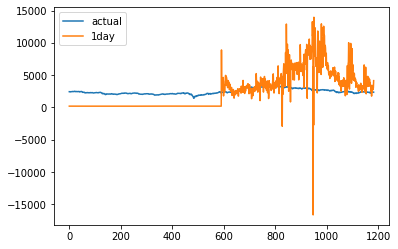

In [129]:
y_test_1 = y_test_1.flatten()
y_test_7 = y_test_7.flatten()
y_test_15 = y_test_15.flatten()
y_test_30 = y_test_30.flatten()
p_test_1 = p_test_1.flatten()
p_test_7 = p_test_7.flatten()
p_test_15 = p_test_15.flatten()
p_test_30 = p_test_30.flatten()

plt.plot(y_test_1)
plt.plot(p_test_1)
plt.legend(['actual', '1day'])
plt.show()

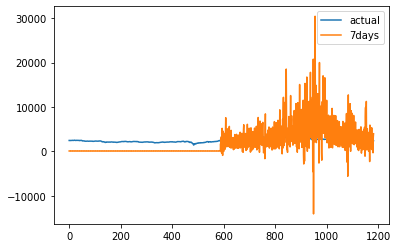

In [130]:
plt.plot(y_test_7)
plt.plot(p_test_7)
plt.legend(['actual', '7days'])
plt.show()

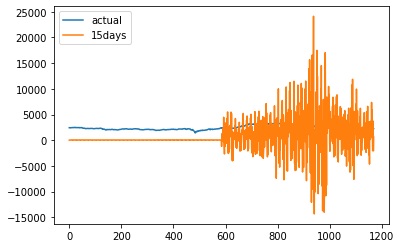

In [131]:
plt.plot(y_test_15)
plt.plot(p_test_15)
plt.legend(['actual', '15days'])
plt.show()

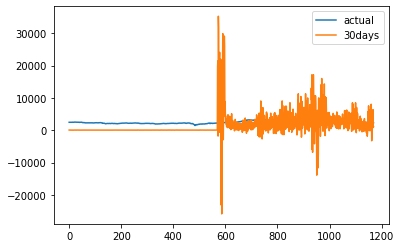

In [132]:
plt.plot(y_test_30)
plt.plot(p_test_30)
plt.legend(['actual', '30days'])
plt.show()